In [32]:
import numpy as np
import matplotlib.pyplot as plt


class SGD:
    
    def __init__(self, eta=0.01):
        self.name = "SGD"
        self.eta = eta
        
    def update(self, t, dW):
        return self.eta * dW
    
class Adam:
    
    def __init__(self, eta=0.01, beta1=0.9, beta2=0.999, epsilon=1e-8):
        self.name = "Adam"
        self.m_dW, self.v_dW = 0, 0
        self.beta1 = beta1
        self.beta2 = beta2
        self.epsilon = epsilon
        self.eta = eta
        
    def update(self, t, dW):
        self.m_dW = self.beta1 * self.m_dW + (1-self.beta1) * dW
        self.v_dW = self.beta2 * self.v_dW + (1-self.beta2) * (dW**2)
        m_dW = self.m_dW / (1-self.beta1**t)
        v_dW = self.v_dW / (1-self.beta2**t)
        return self.eta * (m_dW / (np.sqrt(v_dW) + self.epsilon))

class Regressor:
    
    def __init__(self, f, interval, order, batch_size, optimizer):
        self.f = f
        self.interval = interval
        self.batch_size = batch_size
        self.W = np.zeros((order+1,))
        self.optimizer = optimizer

    def mse(self, y, y_):
        return (y - y_) ** 2
    
    def generate_samples(self):
        X = np.random.uniform(self.interval[0], self.interval[1], self.batch_size)
        Y = np.array([self.f(x) for x in X])
        X = np.array([[x**i for i in range(len(self.W))][::-1] for x  in X])
        return X, Y
    
    def compute_SGD_batch_gradient(self, X, Y):
        y_pred = np.squeeze([np.dot(self.W, x) for x in X]) 
        w_grad = (-2/len(Y)) * np.dot(X.T, Y - y_pred)
        return w_grad.transpose()
    
    def evaluate(self, iteration):
        X = np.linspace(*self.interval)
        Y = np.array([self.f(x) for x in X])
        X = np.array([[x**i for i in range(len(self.W))][::-1] for x  in X])
        pred = np.array([np.dot(self.avg_W/iteration, x) for x in X])
        loss_list = [self.mse(pred[i], Y[i]) for i in range(len(Y))]
        loss = np.sum(loss_list) / len(loss_list)
        return loss
    
    def optimize_parameters(self, iterations, show_coefficients=True):
        loss_list = []
        self.iterations = iterations
        self.avg_W = 0
        for iteration in range(iterations):
            x_batch, y_batch = self.generate_samples()
            dW = self.compute_SGD_batch_gradient(x_batch, y_batch)
            self.W -= self.optimizer.update(iteration+1, dW)
            self.avg_W += self.W
            
            loss = self.evaluate(iteration+1)
            loss_list.append(loss)
            if (iteration + 1) % (iterations//10) == 0:
                if show_coefficients:
                    message = 'Iteration %d/%d,  MSE Loss: %.4f,  Approximated Coefficients: %s' % (iteration+1, iterations, loss, str([round(w, 3) for w in self.W]))
                else:
                    message = 'Iteration %d/%d,  MSE Loss: %.4f' % (iteration+1, iterations, loss)
                print(message)
        return loss_list
    
    def plot_polynomial(self, coefficients, interval, name):
        plt.figure()
        X = np.linspace(interval[0], interval[1], 1000)
        Y = np.array([np.sum([coefficients[::-1][i]*x**i for i in range(len(coefficients))]) for x  in X])
        plt.plot(X, Y, color='green', label="True Polynomial")
        X = np.linspace(interval[0], interval[1], 1000)
        Y = np.array([np.sum([(self.avg_W/self.iterations)[::-1][i]*x**i for i in range(len(self.W))]) for x  in X])
        plt.plot(X, Y, color='red', label="Approximation")
        plt.xlabel("x")
        plt.ylabel("y")
        plt.legend()
        plt.title(name)
        plt.show()
        
    def plot_nonpolynomial(self, f, interval, name):
        plt.figure()
        X = np.linspace(interval[0], interval[1], 1000)
        Y = np.array([np.sum([f(x)]) for x  in X])
        plt.plot(X, Y, color='green', label="True Non-Polynomial")
        X = np.linspace(interval[0], interval[1], 1000)
        Y = np.array([np.sum([(self.avg_W/self.iterations)[::-1][i]*x**i for i in range(len(self.W))]) for x  in X])
        plt.plot(X, Y, color='red', label="Approximation")
        plt.xlabel("x")
        plt.ylabel("y")
        plt.legend()
        plt.title(name)
        plt.show()
        
    def plot_results(self, loss_list):
        plt.figure()
        plt.title("Loss performance - {}".format(self.optimizer.name))
        plt.xlabel("Iterations")
        plt.ylabel("Loss")
        plt.plot(range(len(loss_list)), loss_list, label="loss")
        plt.legend()
        plt.show()
        plt.clf()
        #print("Convergence after {} iterations of training".format(len(train_loss_list)))
        print("Area under test loss curve:", np.sum(loss_list))


def polynomial(coefficients):
    def f(x):
        return np.sum([a*x**i for i,a in enumerate(coefficients[::-1])])
    return f    
        

# Experiment with polynomial regression for the equation: $f(x) = 4x^4 - 8x^3 + 5x^2 + 3x - 12$
# Regressor parameters:
### - Interval: [-1, 1]
### - Polynomial order of approximator: 4
### - Batch size for optimization algorithm: 1
### - Adam eta: 1.0
### - SGD eta: 0.1

Iteration 100/1000,  MSE Loss: 1.0836,  Approximated Coefficients: [5.207, -6.29, 2.301, 1.236, -11.805]
Iteration 200/1000,  MSE Loss: 0.3384,  Approximated Coefficients: [5.639, -7.142, 3.182, 1.7, -11.69]
Iteration 300/1000,  MSE Loss: 0.1668,  Approximated Coefficients: [4.654, -8.271, 3.977, 3.273, -11.859]
Iteration 400/1000,  MSE Loss: 0.0982,  Approximated Coefficients: [4.327, -7.813, 4.363, 3.097, -11.983]
Iteration 500/1000,  MSE Loss: 0.0661,  Approximated Coefficients: [3.943, -8.096, 4.629, 3.185, -11.992]
Iteration 600/1000,  MSE Loss: 0.0456,  Approximated Coefficients: [3.956, -8.204, 5.201, 2.897, -12.202]
Iteration 700/1000,  MSE Loss: 0.0326,  Approximated Coefficients: [4.003, -7.992, 5.152, 3.052, -12.05]
Iteration 800/1000,  MSE Loss: 0.0243,  Approximated Coefficients: [2.45, -7.626, 3.32, 3.952, -12.399]
Iteration 900/1000,  MSE Loss: 0.0184,  Approximated Coefficients: [1.976, -8.962, 5.559, 3.595, -10.983]
Iteration 1000/1000,  MSE Loss: 0.0112,  Approximated

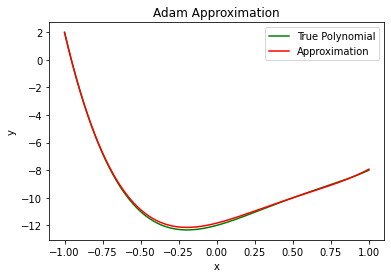

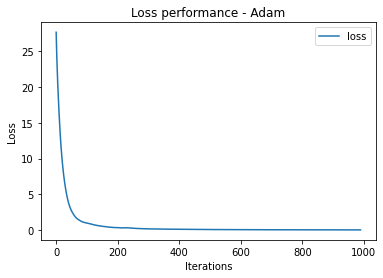

Area under test loss curve: 693.1841400556243
Iteration 100/1000,  MSE Loss: 3.5996,  Approximated Coefficients: [4.959, -2.806, 4.074, -0.766, -11.802]
Iteration 200/1000,  MSE Loss: 1.4526,  Approximated Coefficients: [5.151, -4.035, 4.299, 0.781, -11.625]
Iteration 300/1000,  MSE Loss: 0.8780,  Approximated Coefficients: [4.943, -5.06, 4.263, 1.358, -11.55]
Iteration 400/1000,  MSE Loss: 0.6195,  Approximated Coefficients: [5.018, -5.989, 4.322, 1.939, -11.969]
Iteration 500/1000,  MSE Loss: 0.4541,  Approximated Coefficients: [4.772, -6.548, 4.164, 2.027, -11.893]
Iteration 600/1000,  MSE Loss: 0.3513,  Approximated Coefficients: [4.812, -6.874, 4.314, 2.461, -11.903]
Iteration 700/1000,  MSE Loss: 0.2776,  Approximated Coefficients: [4.795, -7.204, 4.428, 2.563, -11.919]
Iteration 800/1000,  MSE Loss: 0.2235,  Approximated Coefficients: [4.67, -7.448, 4.388, 2.64, -11.919]
Iteration 900/1000,  MSE Loss: 0.1839,  Approximated Coefficients: [4.61, -7.629, 4.403, 2.724, -11.916]
Iter

<Figure size 432x288 with 0 Axes>

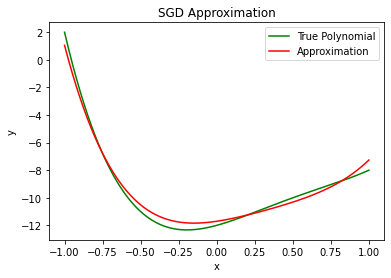

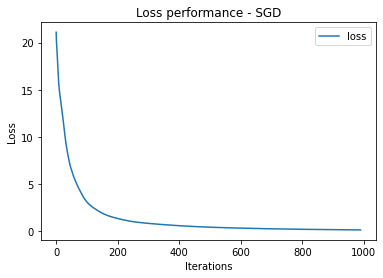

Area under test loss curve: 1379.766360828187


<Figure size 432x288 with 0 Axes>

In [8]:
coefficients = [4, -8, 5, 3, -12] 
f = polynomial(coefficients)            # f(x) = 4x^4 - 8x^3 + 5x^2 + 3x - 12
interval = [-1, 1]
optimizer = Adam(eta=1)
reg = Regressor(f, interval=interval, order=len(coefficients)-1, batch_size=1, optimizer=optimizer)
loss_list = reg.optimize_parameters(iterations=1000)
reg.plot_polynomial(coefficients, interval=interval, name="Adam Approximation")
reg.plot_results(loss_list[10:])

optimizer = SGD(eta=0.1)
reg = Regressor(f, interval=interval, order=len(coefficients)-1, batch_size=1, optimizer=optimizer)
loss_list = reg.optimize_parameters(iterations=1000)
reg.plot_polynomial(coefficients, interval=interval, name="SGD Approximation")
reg.plot_results(loss_list[10:])

# Experiment with polynomial regression for equation of random order and coefficients
# Equation parameters:
### - Polynomial order: random between (10, 100)
### - Coefficient value: random between (-10, 10)
# Regressor parameters:
### - Interval: [-1, 1]
### - Polynomial order of approximator: Same as random genrated equation
### - Batch size for optimization algorithm: 100
### - Adam eta: 1.0
### - SGD eta: 0.1

Order: 18 

Iteration 100/1000,  MSE Loss: 0.1264
Iteration 200/1000,  MSE Loss: 0.0418
Iteration 300/1000,  MSE Loss: 0.0240
Iteration 400/1000,  MSE Loss: 0.0160
Iteration 500/1000,  MSE Loss: 0.0112
Iteration 600/1000,  MSE Loss: 0.0082
Iteration 700/1000,  MSE Loss: 0.0063
Iteration 800/1000,  MSE Loss: 0.0049
Iteration 900/1000,  MSE Loss: 0.0040
Iteration 1000/1000,  MSE Loss: 0.0033


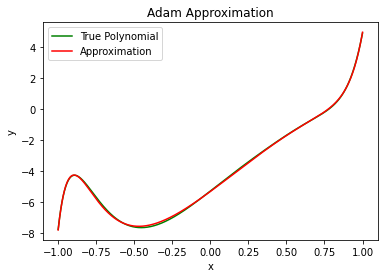

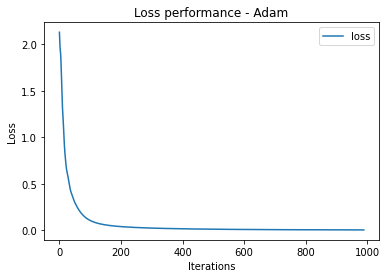

Area under test loss curve: 66.94752127356993
Iteration 100/1000,  MSE Loss: 1.3399
Iteration 200/1000,  MSE Loss: 0.8944
Iteration 300/1000,  MSE Loss: 0.6834
Iteration 400/1000,  MSE Loss: 0.5493
Iteration 500/1000,  MSE Loss: 0.4542
Iteration 600/1000,  MSE Loss: 0.3818
Iteration 700/1000,  MSE Loss: 0.3244
Iteration 800/1000,  MSE Loss: 0.2785
Iteration 900/1000,  MSE Loss: 0.2410
Iteration 1000/1000,  MSE Loss: 0.2101


<Figure size 432x288 with 0 Axes>

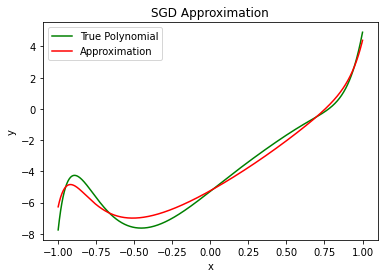

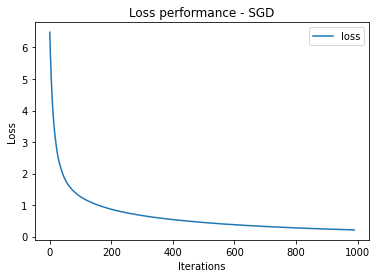

Area under test loss curve: 668.0521323834416


<Figure size 432x288 with 0 Axes>

In [26]:
coefficients = np.random.uniform(-10, 10, np.random.randint(10, 100, 1))
#print("Coefficients:", coefficients)
print("Order:", len(coefficients)-1, '\n')
f = polynomial(coefficients)
interval = [-1, 1]
optimizer = Adam(eta=1)
reg = Regressor(f, interval=interval, order=len(coefficients)-1, batch_size=100, optimizer=optimizer)
loss_list = reg.optimize_parameters(iterations=1000, show_coefficients=False)
reg.plot_polynomial(coefficients, interval=interval, name="Adam Approximation")
reg.plot_results(loss_list[10:])

optimizer = SGD(eta=0.1)
reg = Regressor(f, interval=interval, order=len(coefficients)-1, batch_size=100, optimizer=optimizer)
loss_list = reg.optimize_parameters(iterations=1000, show_coefficients=False)
reg.plot_polynomial(coefficients, interval=interval, name="SGD Approximation")
reg.plot_results(loss_list[10:])

# Experiment with polynomial regression for equation of random order and coefficients
# Equation parameters:
### - Polynomial order: random between (10, 100)
### - Coefficient value: random between (-10, 10)
# Regressor parameters:
### - Interval: [-1, 1]
### - Polynomial order of approximator: 10
### - Batch size for optimization algorithm: 100
### - Adam eta: 1.0
### - SGD eta: 0.1

Order: 86 

Iteration 100/1000,  MSE Loss: 47.2820
Iteration 200/1000,  MSE Loss: 44.4907
Iteration 300/1000,  MSE Loss: 43.2508
Iteration 400/1000,  MSE Loss: 42.1224
Iteration 500/1000,  MSE Loss: 41.0976
Iteration 600/1000,  MSE Loss: 40.3935
Iteration 700/1000,  MSE Loss: 39.9355
Iteration 800/1000,  MSE Loss: 39.5301
Iteration 900/1000,  MSE Loss: 38.9584
Iteration 1000/1000,  MSE Loss: 38.4268


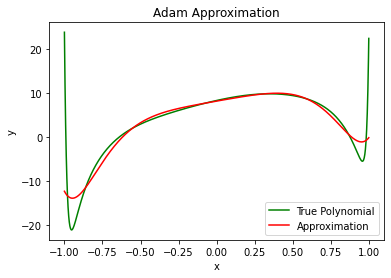

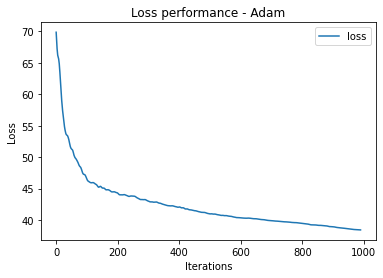

Area under test loss curve: 42078.31478158815
Iteration 100/1000,  MSE Loss: 52.4783
Iteration 200/1000,  MSE Loss: 52.9300
Iteration 300/1000,  MSE Loss: 52.1718
Iteration 400/1000,  MSE Loss: 51.3892
Iteration 500/1000,  MSE Loss: 50.6895
Iteration 600/1000,  MSE Loss: 49.9876
Iteration 700/1000,  MSE Loss: 49.4805
Iteration 800/1000,  MSE Loss: 48.8833
Iteration 900/1000,  MSE Loss: 48.4427
Iteration 1000/1000,  MSE Loss: 48.0592


<Figure size 432x288 with 0 Axes>

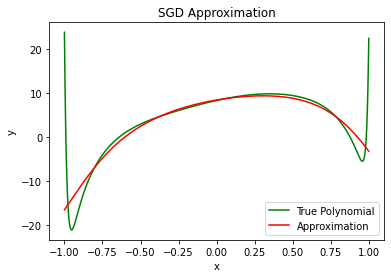

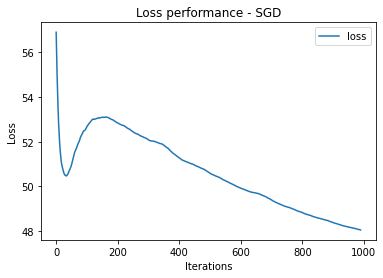

Area under test loss curve: 50096.74193223401


<Figure size 432x288 with 0 Axes>

In [31]:
coefficients = np.random.uniform(-10, 10, np.random.randint(10, 100, 1))
#print("Coefficients:", coefficients)
print("Order:", len(coefficients)-1, '\n')
f = polynomial(coefficients)
interval = [-1, 1]
optimizer = Adam(eta=1)
reg = Regressor(f, interval=interval, order=10, batch_size=100, optimizer=optimizer)
loss_list = reg.optimize_parameters(iterations=1000, show_coefficients=False)
reg.plot_polynomial(coefficients, interval=interval, name="Adam Approximation")
reg.plot_results(loss_list[10:])

optimizer = SGD(eta=0.1)
reg = Regressor(f, interval=interval, order=10, batch_size=100, optimizer=optimizer)
loss_list = reg.optimize_parameters(iterations=1000, show_coefficients=False)
reg.plot_polynomial(coefficients, interval=interval, name="SGD Approximation")
reg.plot_results(loss_list[10:])

# Experiment with polynomial regression for approximating non-polynomial equation
# Input equation: sin(10x)
# Regressor parameters:
### - Interval: [-1, 1]
### - Polynomial order of approximator: 8
### - Batch size for optimization algorithm: 1000
### - Adam eta: 1.0
### - SGD eta: 0.1

Iteration 1000/10000,  MSE Loss: 0.2572
Iteration 2000/10000,  MSE Loss: 0.2111
Iteration 3000/10000,  MSE Loss: 0.1963
Iteration 4000/10000,  MSE Loss: 0.1872
Iteration 5000/10000,  MSE Loss: 0.1794
Iteration 6000/10000,  MSE Loss: 0.1721
Iteration 7000/10000,  MSE Loss: 0.1651
Iteration 8000/10000,  MSE Loss: 0.1583
Iteration 9000/10000,  MSE Loss: 0.1516
Iteration 10000/10000,  MSE Loss: 0.1452


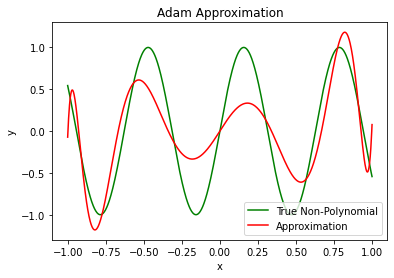

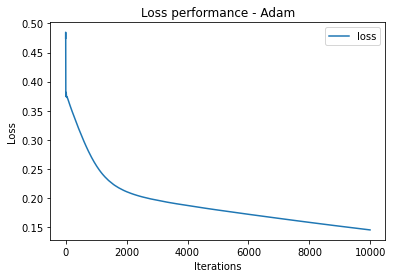

Area under test loss curve: 1926.4554745153378
Iteration 1000/10000,  MSE Loss: 0.3661
Iteration 2000/10000,  MSE Loss: 0.3593
Iteration 3000/10000,  MSE Loss: 0.3582
Iteration 4000/10000,  MSE Loss: 0.3574
Iteration 5000/10000,  MSE Loss: 0.3565
Iteration 6000/10000,  MSE Loss: 0.3555
Iteration 7000/10000,  MSE Loss: 0.3544
Iteration 8000/10000,  MSE Loss: 0.3533
Iteration 9000/10000,  MSE Loss: 0.3521
Iteration 10000/10000,  MSE Loss: 0.3508


<Figure size 432x288 with 0 Axes>

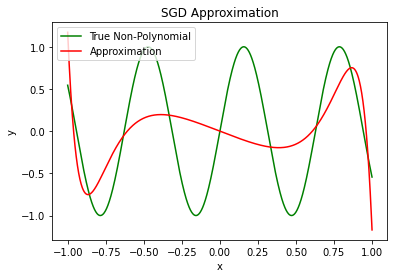

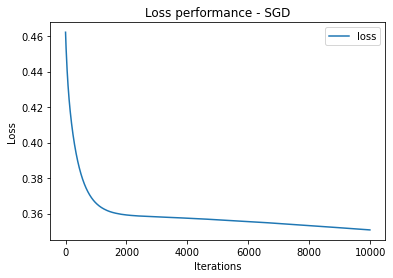

Area under test loss curve: 3591.041439365759


<Figure size 432x288 with 0 Axes>

In [33]:
def sine_function(x):
    return np.math.sin(10*x)

f = sine_function
interval = [-1, 1]
optimizer = Adam(eta=1)
reg = Regressor(f, interval=interval, order=20, batch_size=1000, optimizer=optimizer)
loss_list = reg.optimize_parameters(iterations=10000, show_coefficients=False)
reg.plot_nonpolynomial(f, interval=interval, name="Adam Approximation")
reg.plot_results(loss_list[10:])

optimizer = SGD(eta=0.1)
reg = Regressor(f, interval=interval, order=20, batch_size=1000, optimizer=optimizer)
loss_list = reg.optimize_parameters(iterations=10000, show_coefficients=False)
reg.plot_nonpolynomial(f, interval=interval, name="SGD Approximation")
reg.plot_results(loss_list[10:])